In [1]:
!pip install pykalman 

  Running setup.py bdist_wheel for pykalman: started
  Running setup.py bdist_wheel for pykalman: finished with status 'done'
  Stored in directory: C:\Users\Isela Calvillo\AppData\Local\pip\Cache\wheels\d6\2b\57\aa2d27dc6e9ccc0830a0b9fd62fe2e740ba15feebdb2e5e69e
Successfully built pykalman


In [2]:
%matplotlib inline 
from pykalman import KalmanFilter
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [4]:
tau=.1
kf=KalmanFilter(n_dim_obs=1, n_dim_state=2,
                initial_state_mean=[30,10],
                initial_state_covariance=np.eye(2),
                transition_matrices=[[1,tau],[0,1]],
                observation_matrices=[[1,0]],
                observation_covariance=3,
                transition_covariance=np.zeros((2,2)),
                transition_offsets=[-4.9*tau**2,-9.8*tau])

In [5]:
times= np.arange(40)
actual=-4.9*tau**2*times**2
sim= actual+ 3*np.random.randn(40)
state_means,state_covs=kf.filter(sim)

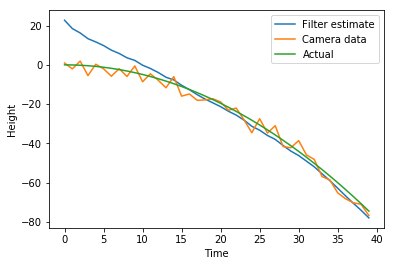

In [6]:
plt.plot(times, state_means[:,0])
plt.plot(times,sim)
plt.plot(times,actual)
plt.legend(["Filter estimate","Camera data","Actual"])
plt.xlabel ("Time")
plt.ylabel("Height")

In [10]:
import pandas_datareader.data as web
import datetime 
start= datetime.datetime(2013,1,1)
end= datetime.datetime(2015,1,27)

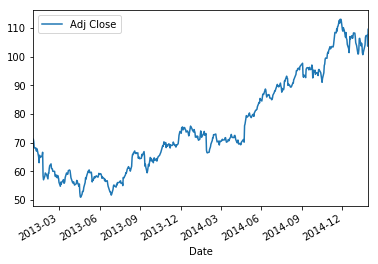

In [11]:
f=web.DataReader("AAPL","yahoo",start,end)
f.plot(f.index,"Adj Close")

In [30]:
%matplotlib notebook
x=f["Adj Close"]


In [31]:
import seaborn as snb

<IPython.core.display.Javascript object>


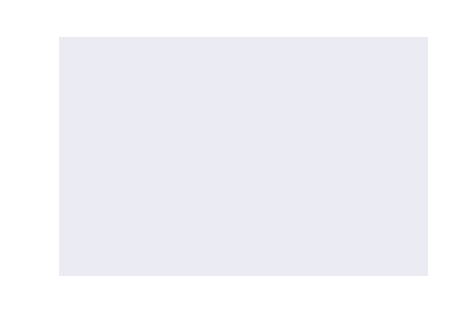

In [33]:
kf=KalmanFilter(transition_matrices=[1],
                observation_matrices=[1],
                initial_state_mean=0,
                initial_state_covariance= 1,
                transition_covariance=.01)
state_means,_=kf.filter(x.values)
state_means_=pd.Series(state_means.flatten(),index=f.index)
mean30= x.rolling(window=30).mean()
mean60= x.rolling(window=60).mean()
mean90= x.rolling(window=90).mean()
plt.plot(state_means)
plt.plot(x)
plt.plot(mean30)
plt.plot(mean60)
plt.plot(mean90)
plt.title("Kalman filter estimate avarage")
plt.legend(["Kalman Estimate","x", "30-day Moving Avarage","60-day Moving Avarage","90-day Moving Avarage"])
plt.xlabel("Day")
plt.ylabel("price")


